<a href="https://colab.research.google.com/github/saavedramarcosdavid/Aprendizaje-de-Maquina/blob/main/Clase6/Clase_6_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje de máquina - Clase 6 - **Regresión**

## Ejercicio 6
Elegir uno de entre los siguientes proyectos sugeridos y aplicar regresion para resolverlo. Cada proyecto tiene datasets de diferentes características y dificultad.

## Proyecto seleccionado: IMDB Rating

El conjunto de datos es del sitio web [Kaggle](https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset). Contiene 28 variables para 5043 películas, que abarcan 100 años en 66 países. El objetivo es predecir el ranking de una película a partir de sus atributos


## Carga y análisis del Dataset


### Carga del dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Como se puede ver `df_info()` deja ver que existe una gran cantidad de datos nulos o faltantes, que deberá ser resuelta para la utilización de los distintos algoritmos.

También se puede ver que existen atributos numéricos: 
*  title_year                 
*  duration                   
*  gross                      
*  budget                     
*  aspect_ratio               
*  num_voted_users            
*  num_critic_for_reviews     
*  num_user_for_reviews       
*  facenumber_in_poster       
*  director_facebook_likes    
*  actor_1_facebook_likes     
*  actor_2_facebook_likes     
*  actor_3_facebook_likes     
*  cast_total_facebook_likes  
*  movie_facebook_likes       
*  imdb_score                 <- **TARGET**

Y otros son texto, los cuales convendría tenerlos en formato numérico para una correcta utilización de la mayoría de los algoritmos de regresión utilizado: 
*  movie_title                
*  genres                     
*  language                   
*  country                    
*  color                    
*  plot_keywords              
*  content_rating     
*  director_name              
*  actor_1_name               
*  actor_2_name               
*  actor_3_name               
*  movie_imdb_link            



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Se elimina columna movie_imdb_link por no ofrecer información relevante

In [3]:
df.drop("movie_imdb_link", axis=1, inplace=True)

### Analisis del dataset

#### Visualización de las distribuciones de cada una de las variables

In [4]:
def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    if data.dtype != object:
        sns.histplot(data, alpha=0.4, kde=True, ax=ax)
        sns.rugplot(data, color="black", ax=ax)
        color = "orange"
        text=f"$\\mu$ = {data.mean():.3f}\n"
        text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

        bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
        ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    else:
        data.value_counts(dropna=True).sort_index().plot(kind='barh',ax=ax)
        ax.axes.xaxis.set_ticklabels([])
    ax.set_title(title)
    

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

In [5]:
df_num =  df.select_dtypes(include =[np.number])
print("Cantidad de atributos:",df_num.columns.shape[0])
print("Atributos:",np.array(df_num.columns))

Cantidad de aptributos: 16
Atributos: ['num_critic_for_reviews' 'duration' 'director_facebook_likes'
 'actor_3_facebook_likes' 'actor_1_facebook_likes' 'gross'
 'num_voted_users' 'cast_total_facebook_likes' 'facenumber_in_poster'
 'num_user_for_reviews' 'budget' 'title_year' 'actor_2_facebook_likes'
 'imdb_score' 'aspect_ratio' 'movie_facebook_likes']


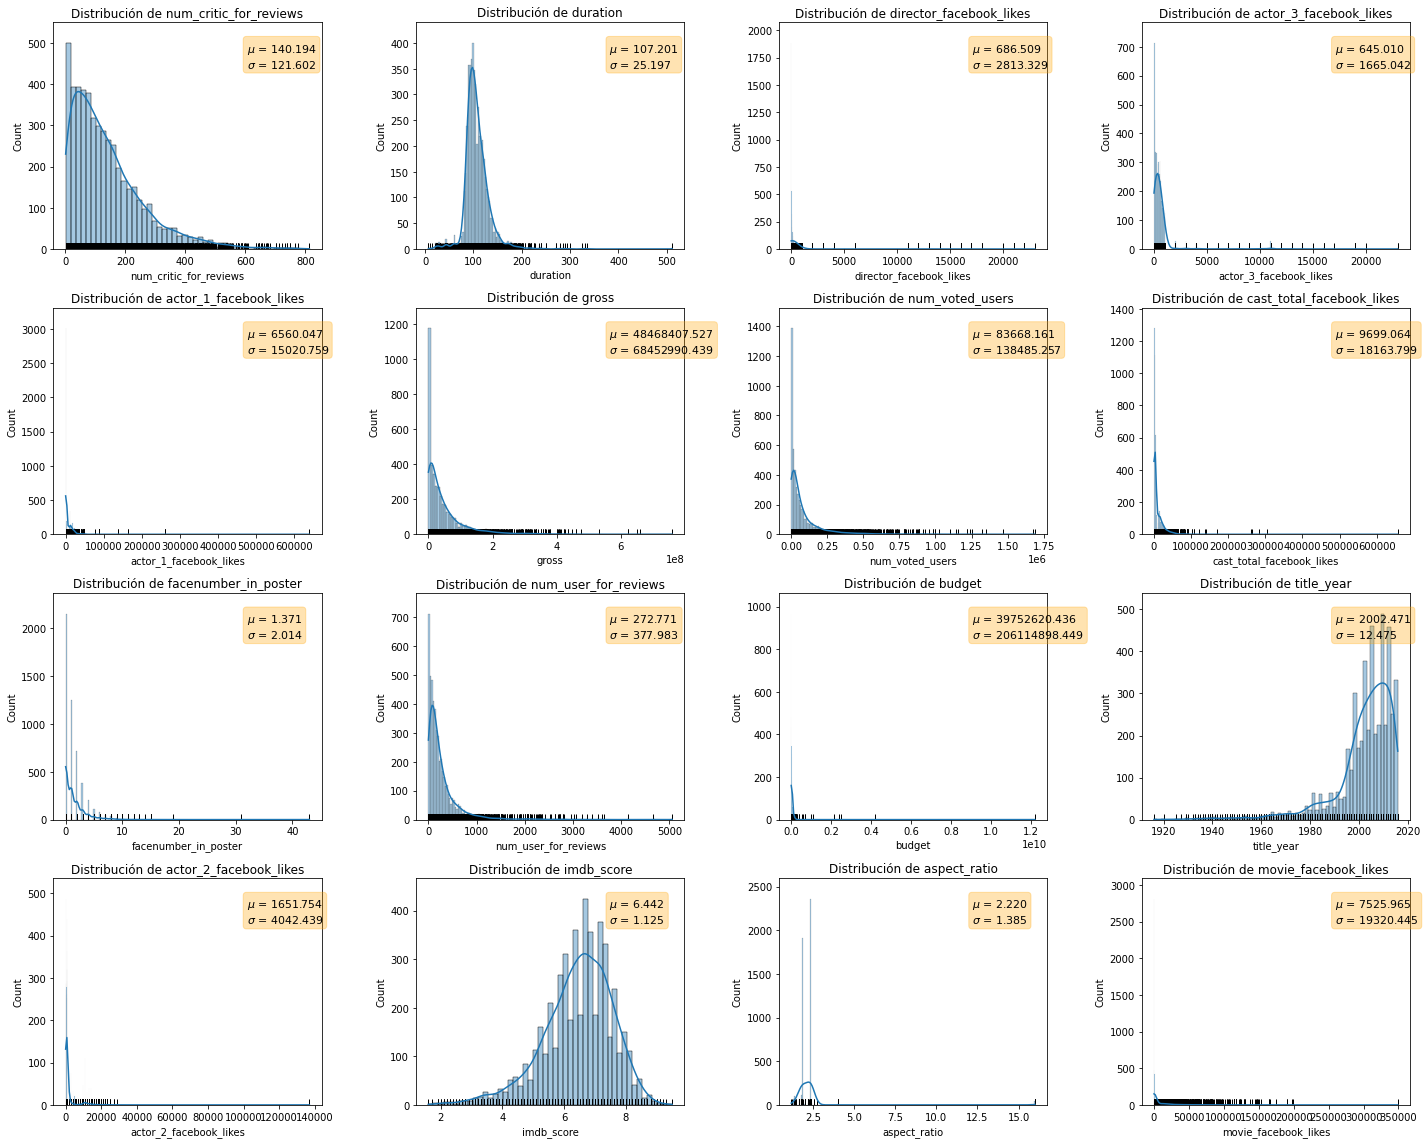

In [6]:
print_dataset(df_num, 4, 4)

Matriz de gráficos de dispersión del conjunto de datos (cada variable frente a todas las demás)

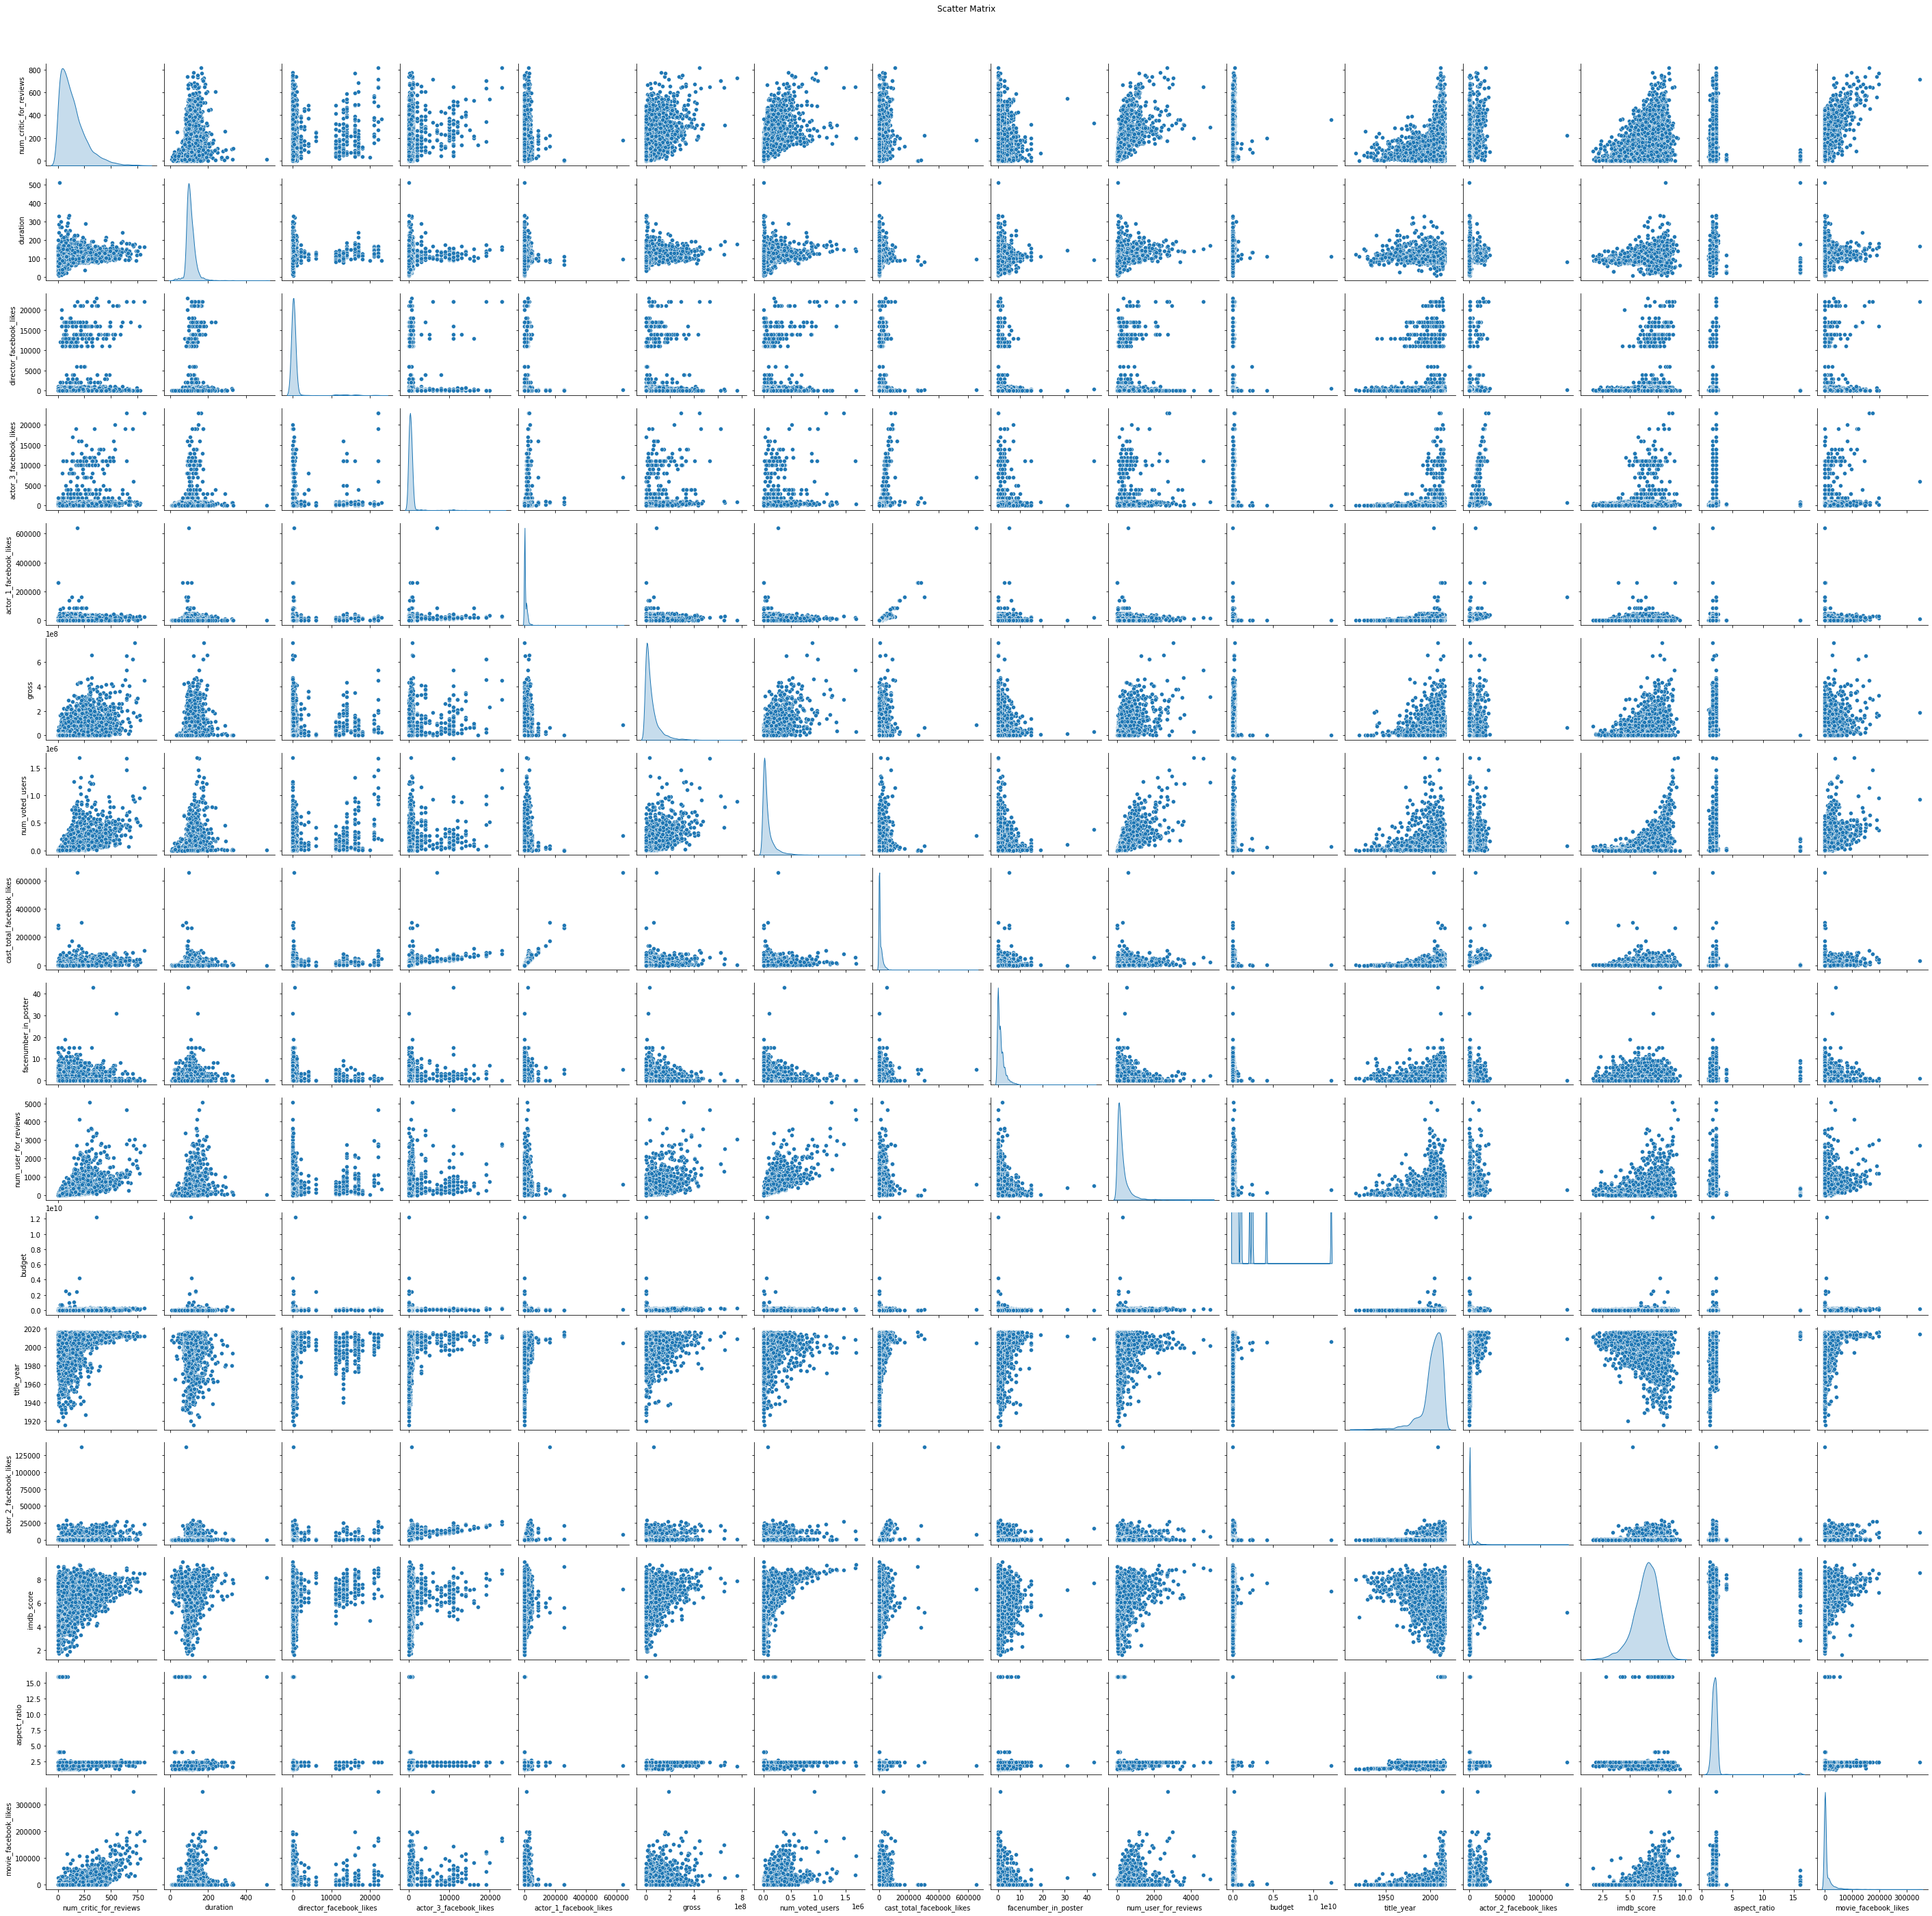

In [7]:
pg = sns.pairplot(data = df_num, diag_kind='kde')
pg.fig.suptitle('Scatter Matrix')
pg.fig.subplots_adjust(top=0.95)

#### Matriz de correlacion

Se puede ver que la correlación de Pearson para *imdb_score* vs las demás variables, no es muy elevada

In [8]:
def matriz_correlacion(df,metodo):
    corr_df = df.corr(method=metodo)

    plt.figure(figsize=(18, 15))
    sns.heatmap(corr_df, annot=True, cmap="Purples")
    plt.show()
    target_corr = corr_df['imdb_score']
    return pd.DataFrame(target_corr).sort_values("imdb_score", ascending=False)

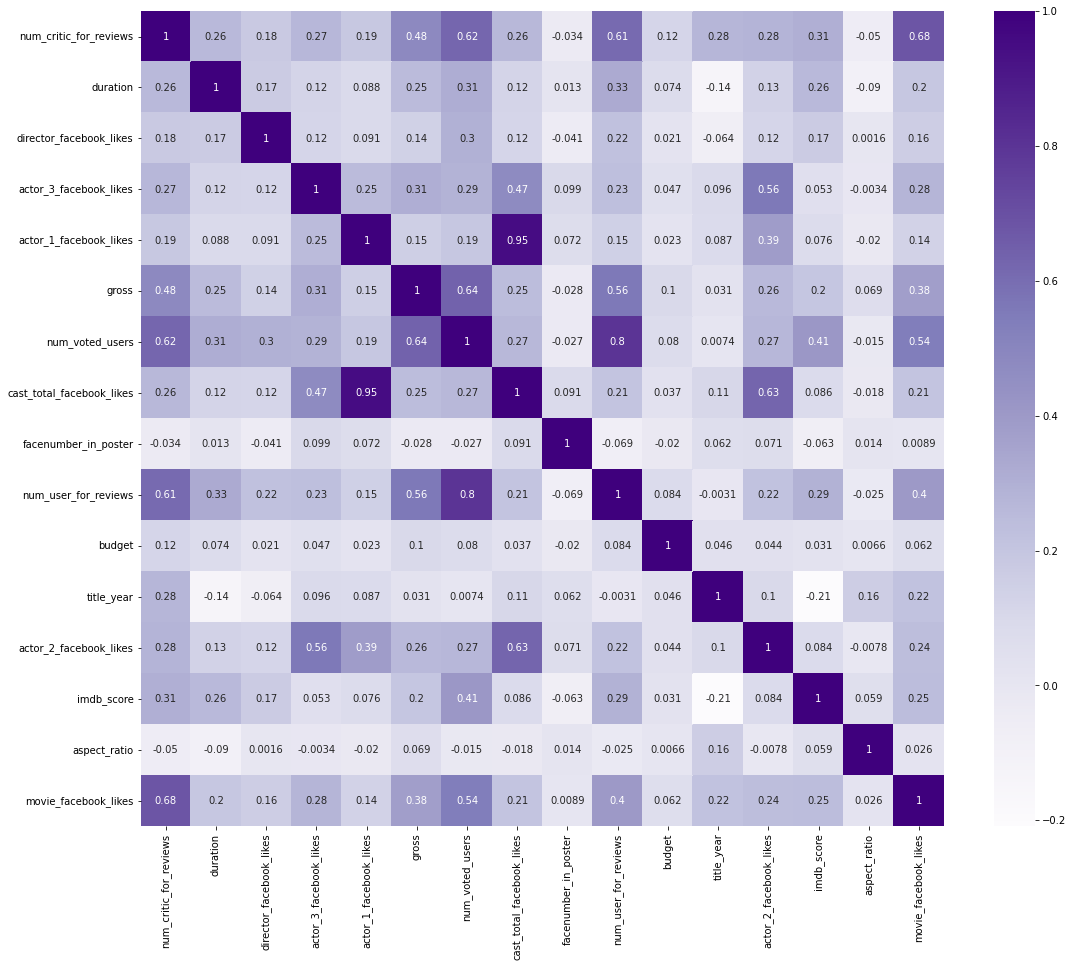

,imdb_score
imdb_score,1.000000
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808


In [9]:
matriz_correlacion(df,'pearson')

## Curado del dataset

### Analisis y solución de datos nulos

Dada la gran cantidad de datos faltantes se plantea tres estrategias de preprocesamiento: 

1.   Eliminar todas las filas con valores nulos dado que se cuenta con un dataset grande (con muchas muestras)
2.   Reemplazar valores nulos por media o moda dependiendo el caso
3.   Realizar una combinación de ambos siguendo un criterio personal



In [4]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

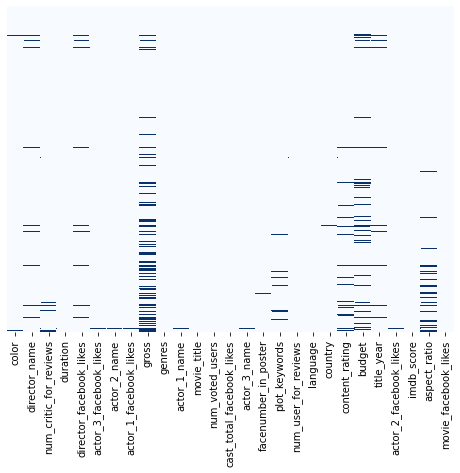

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [7]:
print("---Nominales---")
for i in df.columns:
    if df[i].dtype == object:
        print(i,f"{df[i].dropna(axis=0).unique().shape[0]}")
print("\n---Numericos---")
for i in df.columns:
    if df[i].dtype != object:
        print(i,f"{df[i].dropna(axis=0).mean():.2f}")

---Nominales---
color 2
director_name 2398
actor_2_name 3032
genres 914
actor_1_name 2097
movie_title 4917
actor_3_name 3521
plot_keywords 4760
language 47
country 65
content_rating 18

---Numericos---
num_critic_for_reviews 140.19
duration 107.20
director_facebook_likes 686.51
actor_3_facebook_likes 645.01
actor_1_facebook_likes 6560.05
gross 48468407.53
num_voted_users 83668.16
cast_total_facebook_likes 9699.06
facenumber_in_poster 1.37
num_user_for_reviews 272.77
budget 39752620.44
title_year 2002.47
actor_2_facebook_likes 1651.75
imdb_score 6.44
aspect_ratio 2.22
movie_facebook_likes 7525.96


#### DataFrame df_fill: eliminando filas con valores nulos

In [6]:
df_fill = df.dropna(axis=0)
df_fill.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

#### DataFrame df_remp: Remplazando todos los valores nulos por media/moda

In [8]:
values = {
    "color": df["color"].mode()[0],
    "director_name": "unknown",
    "num_critic_for_reviews": df["num_critic_for_reviews"].mean(),
    "duration": df["duration"].mean(),
    "director_facebook_likes": df["director_facebook_likes"].mean(),
    "actor_1_name": "unknown", "actor_1_facebook_likes": df["actor_1_facebook_likes"].mean(),
    "actor_2_name": "unknown", "actor_2_facebook_likes": df["actor_2_facebook_likes"].mean(),
    "actor_3_name": "unknown", "actor_3_facebook_likes": df["actor_3_facebook_likes"].mean(),
    "gross": df["gross"].mean(),
    "facenumber_in_poster": df["facenumber_in_poster"].mean(),
    "plot_keywords": "unknown",
    "num_user_for_reviews": df["num_user_for_reviews"].mean(),
    "language": df["language"].mode()[0],
    "country": df["country"].mode()[0],
    "content_rating": df["content_rating"].mode()[0],
    "budget": df["budget"].mean(),
    "title_year": df["title_year"].mean(),
    "aspect_ratio": df["aspect_ratio"].mean(),
}

df_remp = df.fillna(value = values)
df_remp.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

#### Dataframe df_m: reemplazando ciertas columnas y eliminando filas restantes
Se reemplazan solo las columnas consideradas por criterio propio, caso contrario se suprimen filas.


In [9]:
values = {
    "color": df["color"].mode()[0],
    "director_name": "unknown",
    "num_critic_for_reviews": df["num_critic_for_reviews"].mean(),
    "duration": df["duration"].mean(),
    "director_facebook_likes": df["director_facebook_likes"].mean(),
    # "actor_1_name": "unknown", "actor_1_facebook_likes": df["actor_1_facebook_likes"].mean(),
    "actor_2_name": "unknown", "actor_2_facebook_likes": df["actor_2_facebook_likes"].mean(),
    "actor_3_name": "unknown", "actor_3_facebook_likes": df["actor_3_facebook_likes"].mean(),
    "gross": df["gross"].mean(),
    "facenumber_in_poster": df["facenumber_in_poster"].mean(),
    "plot_keywords": "unknown",
    "num_user_for_reviews": df["num_user_for_reviews"].mean(),
    # "language": df["language"].mode()[0],
    # "country": df["country"].mode()[0],
    "content_rating": df["content_rating"].mode()[0],
    # "budget": df["budget"].mean(),
    "title_year": df["title_year"].mean(),
    "aspect_ratio": df["aspect_ratio"].mean(),
}
df_m = df.fillna(value = values).dropna(axis=0)
df_m.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### Analisis de atipicos

Se puede observar la cantidad de valores atípicos en cada uno de los atributos numéricos, la mayoría de los cuales, presentan una lógica. Por ejemplo: el número de likes de los actores puede ser extremadamente elevado o muy reducido dependiendo de la fama del mismo, lo mismo sucede con la recaudación/financiación (algunas películas son de bajo presupuesto y otras superproducciones), entre otros.

In [10]:
import numpy as np

def atipicos_columna(y, column):
    '''
        Busca y cuenta los atípicos en un vector pasado por parámetro.
        Se basa en el rango intercuartil.
    '''
    # Calcular rango intercuartil
    y_df = pd.DataFrame({'y': y})

    q25, q75 = np.percentile(y_df['y'], 25), np.percentile(y_df['y'], 75)
    iqr = q75 - q25

    # Calcule el rango de valores atípicos
    k = 1.5
    range_ir = iqr * k

    # Límites
    lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

    # Creacion de mascaras y busqueda de atípicos y no atípicos
    outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in y_df['y']]
    no_outliers_mask_ir = [False if x < lower_bound_ir or x > upper_bound_ir else True for x in y_df['y']]

    outliers = y_df['y'][outliers_mask_ir]
    no_outliers = y_df['y'][no_outliers_mask_ir]

    print("-- Columna: ",column," ->",outliers.shape[0])

def atipicos(df, inicio = 0):
    '''
        Busca y cuenta atípicos en todo el DataFrame pasado por parámetro
    '''
    print("Cantidad de atipicos: ")
    for column in df.columns[inicio:]:
        atipicos_columna(df[column].values, column)

In [11]:
df_num =  df_fill.select_dtypes(include =[np.number])

atipicos(df_num)

Cantidad de atipicos: 
-- Columna:  num_critic_for_reviews  -> 149
-- Columna:  duration  -> 125
-- Columna:  director_facebook_likes  -> 398
-- Columna:  actor_3_facebook_likes  -> 170
-- Columna:  actor_1_facebook_likes  -> 119
-- Columna:  gross  -> 282
-- Columna:  num_voted_users  -> 314
-- Columna:  cast_total_facebook_likes  -> 229
-- Columna:  facenumber_in_poster  -> 153
-- Columna:  num_user_for_reviews  -> 294
-- Columna:  budget  -> 276
-- Columna:  title_year  -> 140
-- Columna:  actor_2_facebook_likes  -> 604
-- Columna:  imdb_score  -> 87
-- Columna:  aspect_ratio  -> 1
-- Columna:  movie_facebook_likes  -> 407


### Eliminación de columnas no informativas y conversion a numérico

En esta sección se realiza como preprocesamiento de los datos, la eliminación de columnas que no resultan de interés o con información "repetida", como lo son los nombres de los miembros del elenco y director, ya que se cuenta con la cantidad de likes en redes sociales; identificación de generos y palabras clave principales; conversión a numérico de columnas con información textual. 

Cabe aclarar que, tras realizar algunas pruebas, se obtuvieron mejores resultados utilizando codificación dummy, a pesar del aumento de dimensionalidad. Por esta razón se ha preferido dicha codificación para datos no numéricos para la gran mayoría de los casos. 

In [12]:
# from sklearn.preprocessing import normalize

def preprocess_dataframe(df):
    '''
        preprocess_dataframe:
            Funcion que elimina las columnas no informativas (columnas_eliminar)
            Convierte a dato numerico las columnas de texto, 
            en codificación numérica o su version dummy.
    '''

    # Eliminar columnas
    columnas_eliminar = [
        # 'color', 
        'movie_title', 
        'plot_keywords', 
        'director_name',
        'actor_1_name', 
        'actor_2_name', 
        'actor_3_name', 
        'country', 
        # 'language', 
        # 'content_rating', 
        'genres', 
        'title_year',
        'imdb_score'
    ]
    df_aux = df.drop(columnas_eliminar, axis=1)


    # Cambiar por numeros
    df_aux['country'] = df['country'].astype('category').cat.codes
    # df_aux['language'] = df['language'].astype('category').cat.codes
    # df_aux['genre1'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x).astype('category').cat.codes
    # df_aux['genre2'] = df['genres'].apply(lambda x: x.split('|')[1] if '|' in x else '-').astype('category').cat.codes
    # df_aux['plot_keywords1'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x).astype('category').cat.codes
    # df_aux['plot_keywords2'] = df['genres'].apply(lambda x: x.split('|')[1] if '|' in x else '-').astype('category').cat.codes
    # df_aux['content_rating'] = df['content_rating'].astype('category').cat.codes
    # df_aux['color'] = df['color'].astype('category').cat.codes
    

    # Dummy version
    df_aux['genre1'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x)
    df_aux['genre2'] = df['genres'].apply(lambda x: x.split('|')[1] if '|' in x else '-')
    df_aux['plot_keywords1'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x)
    df_aux['plot_keywords2'] = df['genres'].apply(lambda x: x.split('|')[1] if '|' in x else '-')

    columnas_dummy = [
        'color', 
        'genre1', 'genre2',
        'plot_keywords1', 'plot_keywords2', 
        'content_rating',
        'language'
    ]
    for columna in columnas_dummy:
        valores=[x for x in df_aux[columna].value_counts().sort_values(ascending=False).index]
        for i in valores:
            df_aux[columna+"_"+i]=np.where(i==df_aux[columna],1,0)
        df_aux = df_aux.drop(columna, axis=1)


    # Agregar el atributo target inalterado
    df_aux['imdb_score'] = df['imdb_score']
    
    return df_aux

In [13]:
df_fill_dr = preprocess_dataframe(df_fill)
df_remp_dr = preprocess_dataframe(df_remp)
df_m_dr = preprocess_dataframe(df_m)

## Algoritmos de regresión

### Función de separación datos de entrenamiento y validación

In [14]:
from sklearn.model_selection import train_test_split

def dataset_split(df, target_name, porcentaje_entrenamiento = 50, porcentaje_testeo = 50):
    '''
        dataset_split
            Divide un dataset (df) en entrenamiento y test segun porcentajes 
            pasados por parámetros
    '''
    total = df.shape[0]
    test_size = porcentaje_testeo/100
    valores = df.drop(target_name, axis=1).values
    target = df[target_name].values
    x_train, x_test, y_train, y_test = train_test_split(
        valores, target, 
        test_size=test_size, 
        # shuffle=True,
        # stratify=target,
    )

    print(f"Datos de entrenamiento: {y_train.shape[0]} ({porcentaje_entrenamiento}%)")
    print(f"Datos de testeo: {y_test.shape[0]} ({porcentaje_testeo}%)")

    return x_train, x_test, y_train, y_test

### Entrenamiento de modelos

En esta sección se crean diversos modelos de regresión con cada una de las variantes de dataset (df_fill, df_remp, df_m) con el fin de determinar posteriormente cuál es el mejor regresor y el grado de influencia de las consideraciones tomadas respecto de los valores nulos.

*Aclaración:* se han probado una gran cantidad de modelos (debido a que resultaron de interés las diferencias de los mismos), además de la utilización de GridSearchCV para la determinación de los mejores hiperparámetros.

In [15]:
from sklearn.model_selection import GridSearchCV

models_df_fill = []
models_df_remp = []
models_df_m = []

#### Regresion Lineal

In [16]:
from sklearn.linear_model import LinearRegression

def regresion_lineal(x_train, x_test, y_train, y_test):
    reg = LinearRegression()
    
    reg.fit(x_train, y_train)
    acc_train = reg.score(x_train,y_train)
    acc_test = reg.score(x_test,y_test)
    
    print("Model: ", reg)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": reg, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [17]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_lineal(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Model:  LinearRegression()
	Accuracy train: 0.49
	Accuracy test: 0.44


In [18]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_lineal(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Model:  LinearRegression()
	Accuracy train: 0.45
	Accuracy test: 0.36


In [19]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_lineal(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Model:  LinearRegression()
	Accuracy train: 0.47
	Accuracy test: 0.43


#### Regresion Lasso

In [20]:
from sklearn.linear_model import LassoCV

def regresion_lasso(x_train, x_test, y_train, y_test): 
    lasso_cv = LassoCV(cv = 10, max_iter = 100000)
    lasso_cv.fit(x_train,y_train)
    
    acc_train = lasso_cv.score(x_train,y_train)
    acc_test = lasso_cv.score(x_test,y_test)
    
    print("Model: ", lasso_cv)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": lasso_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [21]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_lasso(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Model:  LassoCV(cv=10, max_iter=100000)
	Accuracy train: 0.22
	Accuracy test: 0.22


In [22]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_lasso(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Model:  LassoCV(cv=10, max_iter=100000)
	Accuracy train: 0.17
	Accuracy test: 0.18


In [23]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_lasso(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Model:  LassoCV(cv=10, max_iter=100000)
	Accuracy train: 0.21
	Accuracy test: -0.11


#### Regresion Ridge

*Aclaración:* Arroja warnings en ejecución, por lo que se ha eliminado la salida de las celdas (solo a fin de no entorpecer la lectura de la notebook) pero se almacenan los resultados para su posterior análisis y comparación.

In [24]:
from sklearn.linear_model import RidgeCV

def regresion_ridge(x_train, x_test, y_train, y_test): 
    ridge_cv = RidgeCV(cv = 10)
    ridge_cv.fit(x_train,y_train)
    
    acc_train = ridge_cv.score(x_train,y_train)
    acc_test = ridge_cv.score(x_test,y_test)

    print("Model: ", ridge_cv)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": ridge_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_ridge(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_ridge(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_ridge(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

#### Regresion Elasticnet


In [28]:
from sklearn.linear_model import ElasticNetCV

def regresion_elastic_net(x_train, x_test, y_train, y_test): 
    elastic_net_cv = ElasticNetCV(cv = 10, max_iter = 100000)
    elastic_net_cv.fit(x_train,y_train)
    
    acc_train = elastic_net_cv.score(x_train,y_train)
    acc_test = elastic_net_cv.score(x_test,y_test)

    print(f"Accuracy train: {acc_train:.2f}")
    print(f"Accuracy test: {acc_test:.2f}")
    dic_model = {"model": elastic_net_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [29]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_elastic_net(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Accuracy train: 0.23
Accuracy test: 0.20


In [30]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_elastic_net(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Accuracy train: 0.17
Accuracy test: 0.17


In [31]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_elastic_net(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Accuracy train: 0.20
Accuracy test: 0.22


#### Regresion RANSAC


In [32]:
from sklearn.linear_model import RANSACRegressor

def regresion_ransac(x_train, x_test, y_train, y_test): 
    ransac = RANSACRegressor()
    ransac.fit(x_train,y_train)
    
    acc_train = ransac.score(x_train,y_train)
    acc_test = ransac.score(x_test,y_test)

    print("Model: ", ransac)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": ransac, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [33]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_ransac(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Model:  RANSACRegressor()
	Accuracy train: -3.11
	Accuracy test: -0.23


In [34]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_ransac(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Model:  RANSACRegressor()
	Accuracy train: -0.15
	Accuracy test: 0.23


In [35]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_ransac(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Model:  RANSACRegressor()
	Accuracy train: -3.29
	Accuracy test: -0.02


#### Regresion LARS

*Aclaración:* Arroja Warnings en ejecución dado que al realizar la Estandarización internamente algunos valores se vuelven "inestables". Se ha eliminado la salida de las celdas aunque se almacenan los resultados para su posterior comparación.

In [36]:
from sklearn.linear_model import LarsCV

def regresion_lars(x_train, x_test, y_train, y_test): 
    lars_cv = LarsCV(cv = 10, max_iter = 100000)
    lars_cv.fit(x_train,y_train)
    
    acc_train = lars_cv.score(x_train,y_train)
    acc_test = lars_cv.score(x_test,y_test)
    
    print("Model: ", lars_cv)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": lars_cv, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_lars(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_lars(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_lars(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

#### Arbol de decision

In [40]:
from sklearn.tree import DecisionTreeRegressor

def regresion_arbol_decision(x_train, x_test, y_train, y_test): 
    dt = DecisionTreeRegressor(random_state=1)
    dt_params = {'max_depth': np.arange(1,15), 'min_samples_leaf': np.arange(2,15)}

    GS_dt = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
    GS_dt.fit(x_train, y_train)
    dt = GS_dt.best_estimator_
    acc_train = dt.score(x_train, y_train)
    acc_test = dt.score(x_test, y_test)
    
    print("Model: ", dt)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": dt, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [41]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_arbol_decision(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Model:  DecisionTreeRegressor(max_depth=6, min_samples_leaf=13, random_state=1)
	Accuracy train: 0.53
	Accuracy test: 0.40


In [42]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_arbol_decision(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Model:  DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=1)
	Accuracy train: 0.46
	Accuracy test: 0.34


In [43]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_arbol_decision(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Model:  DecisionTreeRegressor(max_depth=8, min_samples_leaf=12, random_state=1)
	Accuracy train: 0.56
	Accuracy test: 0.35


#### Bosques Aleatorios

In [44]:
from sklearn.ensemble import RandomForestRegressor

def regresion_bosque_aleatorio(x_train, x_test, y_train, y_test): 
    rf= RandomForestRegressor(random_state=1)
    rf_params={'n_estimators': np.arange(1,50)}

    rf_grid=GridSearchCV(estimator= rf, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
    rf_grid.fit(x_train, y_train)
    rf = rf_grid.best_estimator_
    acc_train = rf.score(x_train, y_train)
    acc_test = rf.score(x_test, y_test)
    
    print("Model: ", rf)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": rf, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [45]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_bosque_aleatorio(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Model:  RandomForestRegressor(n_estimators=49, random_state=1)
	Accuracy train: 0.94
	Accuracy test: 0.61


In [46]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_bosque_aleatorio(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Model:  RandomForestRegressor(n_estimators=49, random_state=1)
	Accuracy train: 0.93
	Accuracy test: 0.52


In [47]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_bosque_aleatorio(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Model:  RandomForestRegressor(n_estimators=49, random_state=1)
	Accuracy train: 0.93
	Accuracy test: 0.54


#### K-NN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

def regresion_vecinos_cercanos(x_train, x_test, y_train, y_test): 
    knn = KNeighborsRegressor()
    knn_params = {'n_neighbors': np.arange(3,int(np.sqrt(x_train.shape[0]))), 'weights':['uniform', 'distance']}

    knn_grid=GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring='neg_mean_squared_error')
    knn_grid.fit(x_train, y_train)
    knn = knn_grid.best_estimator_
    acc_train = knn.score(x_train, y_train)
    acc_test = knn.score(x_test, y_test)
    
    print("Model: ", knn)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": knn, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [49]:
x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
dic_model_df_fill = regresion_vecinos_cercanos(x_train, x_test, y_train, y_test)
models_df_fill.append(dic_model_df_fill)

Datos de entrenamiento: 2629 (70%)
Datos de testeo: 1127 (30%)
Model:  KNeighborsRegressor(n_neighbors=50, weights='distance')
	Accuracy train: 1.00
	Accuracy test: 0.09


In [50]:
x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
dic_model_df_remp = regresion_vecinos_cercanos(x_train, x_test, y_train, y_test)
models_df_remp.append(dic_model_df_remp)

Datos de entrenamiento: 3530 (70%)
Datos de testeo: 1513 (30%)
Model:  KNeighborsRegressor(n_neighbors=34)
	Accuracy train: 0.12
	Accuracy test: 0.05


In [51]:
x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
dic_model_df_m = regresion_vecinos_cercanos(x_train, x_test, y_train, y_test)
models_df_m.append(dic_model_df_m)

Datos de entrenamiento: 3174 (70%)
Datos de testeo: 1361 (30%)
Model:  KNeighborsRegressor(n_neighbors=55, weights='distance')
	Accuracy train: 1.00
	Accuracy test: 0.06


#### SVR (No ejecutar)

Dada la gran dimensionalidad del dataset, no es conveniente utilizar este método puesto que provoca tiempos de ejecución y cómputo innecesarios.

In [54]:
from sklearn.svm import SVR

def regresion_svr(x_train, x_test, y_train, y_test): 
    svr = SVR()
    svr_params = {'kernel': ('linear', 'rbf')} #, 'gamma': ('auto','scale')

    svr_grid=GridSearchCV(estimator=svr, param_grid=svr_params, cv=3, scoring='neg_mean_squared_error')
    svr_grid.fit(x_train, y_train)
    rf = svr_grid.best_estimator_
    acc_train = svr.score(x_train, y_train)
    acc_test = svr.score(x_test, y_test)
    
    print("Model: ", svr)
    print(f"\tAccuracy train: {acc_train:.2f}")
    print(f"\tAccuracy test: {acc_test:.2f}")
    dic_model = {"model": svr, "acc_train": acc_train, "acc_test": acc_test}
    return dic_model

In [ ]:
# x_train, x_test, y_train, y_test = dataset_split(df_fill_dr, "imdb_score", 70, 30)
# dic_model_df_fill = regresion_svr(x_train, x_test, y_train, y_test)
# models_df_fill.append(dic_model_df_fill)

In [ ]:
# x_train, x_test, y_train, y_test = dataset_split(df_remp_dr, "imdb_score", 70, 30)
# dic_model_df_remp = regresion_svr(x_train, x_test, y_train, y_test)
# models_df_remp.append(dic_model_df_remp)

In [ ]:
# x_train, x_test, y_train, y_test = dataset_split(df_m_dr, "imdb_score", 70, 30)
# dic_model_df_m = regresion_svr(x_train, x_test, y_train, y_test)
# models_df_m.append(dic_model_df_m)

## Comparacion de modelos y conclusiones

Se realiza una comparación de los modelos obtenidos por cada uno de los conjuntos de datos trabajados.

### df_fill

In [96]:
df_results_models = pd.DataFrame(models_df_fill)
df_results_models['model'] = df_results_models['model'].apply(lambda x: x.__class__.__name__)
df_results_models['acc_train'] = df_results_models['acc_train'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models['acc_test'] = df_results_models['acc_test'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models

,model,acc_train,acc_test
0,LinearRegression,49.40,44.21
1,LassoCV,22.48,22.48
2,RidgeCV,47.92,46.72
3,ElasticNetCV,23.43,20.28
4,RANSACRegressor,0.00,0.00
5,LarsCV,45.90,45.73
6,DecisionTreeRegressor,52.53,39.66
7,RandomForestRegressor,93.51,60.59
8,KNeighborsRegressor,100.00,9.46


### df_remp


In [88]:
df_results_models = pd.DataFrame(models_df_remp)
df_results_models['model'] = df_results_models['model'].apply(lambda x: x.__class__.__name__)
df_results_models['acc_train'] = df_results_models['acc_train'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models['acc_test'] = df_results_models['acc_test'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models

,model,acc_train,acc_test
0,LinearRegression,45.26,35.91
1,LassoCV,16.71,17.98
2,RidgeCV,44.61,36.95
3,ElasticNetCV,16.75,16.83
4,RANSACRegressor,0.00,23.06
5,LarsCV,39.21,38.86
6,DecisionTreeRegressor,46.10,33.99
7,RandomForestRegressor,93.12,51.99
8,KNeighborsRegressor,12.30,4.91


### df_m


In [89]:
df_results_models = pd.DataFrame(models_df_m)
df_results_models['model'] = df_results_models['model'].apply(lambda x: x.__class__.__name__)
df_results_models['acc_train'] = df_results_models['acc_train'].apply(lambda x: round(x*100,2) if x>0 else 0)
df_results_models['acc_test'] = df_results_models['acc_test'].apply(lambda x: round(x*100,2) if x>0 else 0)

df_results_models

,model,acc_train,acc_test
0,LinearRegression,46.57,42.82
1,LassoCV,20.55,0.00
2,RidgeCV,45.04,44.27
3,ElasticNetCV,19.51,21.87
4,RANSACRegressor,0.00,0.00
5,LarsCV,42.11,38.87
6,DecisionTreeRegressor,56.01,35.27
7,RandomForestRegressor,93.37,54.01
8,KNeighborsRegressor,100.00,6.03


### Conclusiones:

* Se realizó un análisis de un conjunto de datos de películas de imdb con el objetivo de encontrar patrones que sean de utilidad para la predicción del puntaje de los films. En este análisis se encontraron los siguientes problemas: 
    * Una gran cantidad de datos faltantes: para ello se realizaron tres tipos de preprocesamiento en los que se consideró la eliminación de filas con valores nulos, o el remplazo por moda/media segun corresponda.
    * Tipos de datos no numéricos: por lo general los algoritmos utilizados en regresión utilizan valores numéricos, por lo que se han empleado dos tipos de codificaciones, pero en este análisis se ha procedido por utilizar la codificación dummy para la mayor parte de los atributos no numéricos (decisión fundada en cantidades relativamente pequeñas de valores únicos para los atributos considerados, algunos de los cuales generados en base a datos del dataset original). 
* Existe una gran cantidad de modelos de regresión, muchos provienen de la estadística y otros de la rama del Aprendizaje Automático (clasificadores convertidos en regresores). Aquí se han probado 10 de ellos (`LinearRegression`, `Lasso`, `Ridge`, `ElasticNetCV`, `RANSAC`, `Lars`, `DecisionTree`, `RandomForest`, `KNeighbors` y `SVR`)
    * No se han conseguido resultados muy superiores en cuanto a exactitud, aunque en algunos casos se ha logrado predicir correctamente más de la mitad de los ejemplos en etapa de validación (máximo accuracy 60%). 
    * Los modelos que se han destacado: `RandomForest` obteniendo los mejores resultados, seguido del regresor `Ridge`, y el regresor `LinearRegression` que dado lo analizado en las primeras etapas del procesamiento no parecía prometedor.
    * Los modelos `Lasso`, `RANSAC` y `KNeighbors` no han sido útiles en este problema.
    * En el caso particular del regresor basado en el modelo de máquina de soporte vectorial `SVR`, no se ha podido utilizar dado que por la gran dimensionalidad del dataset, implica tiempos de entrenamiento demasiado extensos.
* Se ha comparado para cada uno de los DataFrames (alternativas de procesamiento de datos faltantes: `df_fill` -eliminacion de filas con valores nulos-, `df_remp` -remplazo por media y moda- y `df_m` -ambas estrategias segun criterio personal-) los modelos óptimos, es decir, aquellos con los parámetros encontrdos usado GridSearch para cada regresor. Conclusión: 
    * Se obtuvieron mejores resultados utilizando el DataFrame `df_fill`, por lo que podría inferir que es la mejor opción dado que no se agrega "información errónea o generada" a solo efecto de completitud. Dado que el DataFrame con  métricas más desfavorables es `df_remp`. 
